In [ ]:
import pandas as pd

In [3]:
file_path = '/mnt/c/Users/KDT21/Desktop/DM/diabetes.csv'
diabetes_df = pd.read_csv(file_path)

In [4]:
print(diabetes_df.describe())
print(diabetes_df.shape)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [5]:
#insulin 컬럼 제거
col_to_drop = 'Insulin'
non_ins_df = diabetes_df.drop(columns=[col_to_drop], axis=1)
print(non_ins_df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness         BMI  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   31.992578   
std       3.369578   31.972618      19.355807      15.952218    7.884160   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000   27.300000   
50%       3.000000  117.000000      72.000000      23.000000   32.000000   
75%       6.000000  140.250000      80.000000      32.000000   36.600000   
max      17.000000  199.000000     122.000000      99.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome  
count                768.000000  768.000000  768.000000  
mean                   0.471876   33.240885    0.348958  
std                    0.331329   11.760232    0.476951  
min                    0.078000   21.000000    0.000000  
25%                    0.

In [6]:
import numpy as np
import pandas as pd

# 원본 복사 및 0을 NaN으로 변환 (이전과 동일)
nan_df = non_ins_df.copy()
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
nan_df[cols_to_replace] = nan_df[cols_to_replace].replace(0, np.nan)

print(f"NaN 변환 후 데이터셋 크기: {nan_df.shape}")
print(f"결측치 개수:\n{nan_df.isnull().sum()}")

NaN 변환 후 데이터셋 크기: (768, 8)
결측치 개수:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [7]:
# nan_df에서 target, input 데이터 분리
data_target = nan_df['Outcome']
data_input = nan_df.drop('Outcome', axis=1)

In [8]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, test_size = 0.2, stratify = data_target, random_state = 42)

In [9]:
print(f"train_input shape : {train_input.shape}")
print(f"test_input shape : {test_input.shape}")
print(614+154)

train_input shape : (614, 7)
test_input shape : (154, 7)
768


In [10]:
#결측치 대치를 위해 train_input + train_target
cb_train = train_input.copy()
cb_train['Outcome'] = train_target

print(cb_train.shape)
print(cb_train.describe)

(614, 8)
<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
353            1     90.0           62.0           12.0  27.2   
711            5    126.0           78.0           27.0  29.6   
373            2    105.0           58.0           40.0  34.9   
46             1    146.0           56.0            NaN  29.7   
682            0     95.0           64.0           39.0  44.6   
..           ...      ...            ...            ...   ...   
451            2    134.0           70.0            NaN  28.9   
113            4     76.0           62.0            NaN  34.0   
556            1     97.0           70.0           40.0  38.1   
667           10    111.0           70.0           27.0  27.5   
107            4    144.0           58.0           28.0  29.5   

     DiabetesPedigreeFunction  Age  Outcome  
353                     0.580   24        0  
711                     0.439   40        0  
373                     0.225   25    

In [11]:
#outcome 결과에 따라 훈련 데이터 분류
gr_train = cb_train.groupby('Outcome')

#분류에 따라 median 값 계산
median_by_class = gr_train.median()

print("--------------------속성별 중앙값---------------------")
print(median_by_class)

--------------------속성별 중앙값---------------------
         Pregnancies  Glucose  BloodPressure  SkinThickness    BMI  \
Outcome                                                              
0                2.0    108.0           70.0           27.0  30.10   
1                4.0    141.5           76.0           33.0  34.35   

         DiabetesPedigreeFunction   Age  
Outcome                                  
0                          0.3415  27.0  
1                          0.4610  36.0  


In [12]:
#0값이 있는 속성 median 저장 : Glucose, BloodPressure, SkinThickness, BMI 
glucose_median_0 = median_by_class.loc[0, 'Glucose']
glucose_median_1 = median_by_class.loc[1, 'Glucose']

BP_median_0 = median_by_class.loc[0, 'BloodPressure']
BP_median_1 = median_by_class.loc[1, 'BloodPressure']

skin_median_0 = median_by_class.loc[0, 'SkinThickness']
skin_median_1 = median_by_class.loc[1, 'SkinThickness']

bmi_median_0 = median_by_class.loc[0, 'BMI']
bmi_median_1 = median_by_class.loc[1, 'BMI']

In [13]:
print("-------------nan 대치가 필요한 속성 ----------------")
print(cols_to_replace)
print()
print("-----------------속성별 중앙값 ----------------")
print(f"1: {glucose_median_1, BP_median_1, skin_median_1, bmi_median_1 }")
print(f"0: {glucose_median_0, BP_median_0, skin_median_0, bmi_median_0 }")
print()
print("-----------------전체 속성별 중앙값 ----------------")
print(median_by_class)

-------------nan 대치가 필요한 속성 ----------------
['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']

-----------------속성별 중앙값 ----------------
1: (np.float64(141.5), np.float64(76.0), np.float64(33.0), np.float64(34.349999999999994))
0: (np.float64(108.0), np.float64(70.0), np.float64(27.0), np.float64(30.1))

-----------------전체 속성별 중앙값 ----------------
         Pregnancies  Glucose  BloodPressure  SkinThickness    BMI  \
Outcome                                                              
0                2.0    108.0           70.0           27.0  30.10   
1                4.0    141.5           76.0           33.0  34.35   

         DiabetesPedigreeFunction   Age  
Outcome                                  
0                          0.3415  27.0  
1                          0.4610  36.0  


In [14]:
#train data에서 결측치 각 분류별 중앙값으로 대치
cb_train['Glucose'] = cb_train['Glucose'].fillna(
    cb_train.groupby('Outcome')['Glucose'].transform('median'))

cb_train['BloodPressure'] = cb_train['BloodPressure'].fillna(
    cb_train.groupby('Outcome')['BloodPressure'].transform('median'))

cb_train['SkinThickness'] = cb_train['SkinThickness'].fillna(
    cb_train.groupby('Outcome')['SkinThickness'].transform('median'))

cb_train['BMI'] = cb_train['BMI'].fillna(
    cb_train.groupby('Outcome')['BMI'].transform('median'))


In [15]:
print(cb_train.describe())
print(cb_train.shape)

       Pregnancies     Glucose  BloodPressure  SkinThickness         BMI  \
count   614.000000  614.000000     614.000000     614.000000  614.000000   
mean      3.819218  121.721498      72.172638      29.127036   32.428339   
std       3.314148   30.032904      12.289580       9.027969    6.829566   
min       0.000000   56.000000      24.000000       7.000000   18.200000   
25%       1.000000   99.000000      64.000000      25.000000   27.625000   
50%       3.000000  117.000000      72.000000      28.000000   32.400000   
75%       6.000000  141.000000      80.000000      33.000000   36.500000   
max      17.000000  199.000000     122.000000      99.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome  
count                614.000000  614.000000  614.000000  
mean                   0.477428   33.366450    0.348534  
std                    0.330300   11.833438    0.476895  
min                    0.084000   21.000000    0.000000  
25%                    0.

In [16]:
#print(train_input.describe())
#print(train_input.shape)

In [17]:
#test_input + test_target 데이터 준비

cb_test = test_input.copy()
cb_test['Outcome'] = test_target
print(cb_test.shape)
print(cb_test.describe())

(154, 8)
       Pregnancies     Glucose  BloodPressure  SkinThickness         BMI  \
count   154.000000  153.000000     142.000000     102.000000  152.000000   
mean      3.948052  121.627451      73.485915      29.558824   32.491447   
std       3.591552   32.317887      11.807400      10.334575    7.144469   
min       0.000000   44.000000      48.000000      10.000000   18.200000   
25%       1.000000  100.000000      65.250000      22.250000   26.500000   
50%       3.000000  118.000000      72.000000      29.000000   31.800000   
75%       6.000000  142.000000      81.500000      36.750000   36.675000   
max      15.000000  197.000000     106.000000      63.000000   59.400000   

       DiabetesPedigreeFunction         Age     Outcome  
count                154.000000  154.000000  154.000000  
mean                   0.449740   32.740260    0.350649  
std                    0.335567   11.487877    0.478730  
min                    0.078000   21.000000    0.000000  
25%             

In [18]:
#test 데이터 결측치 train 데이터의 중앙값으로 대치

cb_test.loc[(cb_test['Outcome'] == 0) & (cb_test['Glucose'].isnull()), 'Glucose'] = glucose_median_0
cb_test.loc[(cb_test['Outcome'] == 1) & (cb_test['Glucose'].isnull()), 'Glucose'] = glucose_median_1

cb_test.loc[(cb_test['Outcome'] == 0) & (cb_test['BloodPressure'].isnull()), 'BloodPressure'] = BP_median_0
cb_test.loc[(cb_test['Outcome'] == 1) & (cb_test['BloodPressure'].isnull()), 'BloodPressure'] = BP_median_1

cb_test.loc[(cb_test['Outcome'] == 0) & (cb_test['SkinThickness'].isnull()), 'SkinThickness'] = skin_median_0
cb_test.loc[(cb_test['Outcome'] == 1) & (cb_test['SkinThickness'].isnull()), 'SkinThickness'] = skin_median_1

cb_test.loc[(cb_test['Outcome'] == 0) & (cb_test['BMI'].isnull()), 'BMI'] = bmi_median_0
cb_test.loc[(cb_test['Outcome'] == 1) & (cb_test['BMI'].isnull()), 'BMI'] = bmi_median_1

In [19]:
print(cb_test.shape)
print(cb_test.describe())

(154, 8)
       Pregnancies     Glucose  BloodPressure  SkinThickness         BMI  \
count   154.000000  154.000000     154.000000     154.000000  154.000000   
mean      3.948052  121.538961      73.409091      29.512987   32.460390   
std       3.591552   32.230812      11.368236       8.570535    7.102816   
min       0.000000   44.000000      48.000000      10.000000   18.200000   
25%       1.000000  100.000000      66.000000      25.000000   26.600000   
50%       3.000000  117.000000      72.000000      28.000000   31.600000   
75%       6.000000  141.500000      80.000000      33.000000   36.600000   
max      15.000000  197.000000     106.000000      63.000000   59.400000   

       DiabetesPedigreeFunction         Age     Outcome  
count                154.000000  154.000000  154.000000  
mean                   0.449740   32.740260    0.350649  
std                    0.335567   11.487877    0.478730  
min                    0.078000   21.000000    0.000000  
25%             

In [20]:
#대치된 test data set >  input, taret 분리

x_test = cb_test.drop('Outcome', axis =1)
y_test = cb_test['Outcome']

print(f"X_test(input) shape: {x_test.shape}")
print(f"y_test(target) shape: {y_test.shape}")

X_test(input) shape: (154, 7)
y_test(target) shape: (154,)


In [21]:
#대치된 train data set >  input, taret 분리

x_train = cb_train.drop('Outcome', axis =1)
y_train = cb_train['Outcome']

print(f"X_train(input) shape: {x_train.shape}")
print(f"y_train(target) shape: {y_train.shape}")

X_train(input) shape: (614, 7)
y_train(target) shape: (614,)


In [22]:
#1번, KNeighborsClassifier(non_scaled test set, train set)

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

kn.fit(x_train, y_train)
print(kn.score(x_train, y_train))
print(kn.score(x_test, y_test))

0.8550488599348535
0.7337662337662337


In [23]:
#1번, KNeighborsClassifier(non_scaled test set, train set)
#KNN 최적의 n 찾기

best_score = 0
best_n = 0

for n in range(1, 50):
    kn.n_neighbors = n
    kn.fit(x_train, y_train) 
    score = kn.score(x_test, y_test) 
    
    if score > best_score:
        best_score = score
        best_n = n

print(f"가장 높은 점수: {best_score:.4f}, 최적의 n 값: {best_n}")

가장 높은 점수: 0.7662, 최적의 n 값: 4


In [24]:
# 1번, KNeighborsClassifier(non_scaled test set, train set)
# 최적의 n으로 훈련 및 점수 확인
from sklearn.neighbors import KNeighborsClassifier
kn_4 = KNeighborsClassifier(n_neighbors= 4)

kn_4.fit(x_train, y_train)
print(kn_4.score(x_train, y_train))
print(kn_4.score(x_test, y_test))

0.8517915309446255
0.7662337662337663


In [25]:
#2번, KNeighborsClassifier(scaled test set, train set)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(x_train)  
test_scaled = scaler.transform(x_test) 

In [26]:
#2번, KNeighborsClassifier(scaled test set, train set)
kn_scaled = KNeighborsClassifier()

kn_scaled.fit(train_scaled, train_target)
print(kn_scaled.score(train_scaled, y_train))
print(kn_scaled.score(test_scaled, y_test))

0.8273615635179153
0.7402597402597403


In [27]:
#2번, KNeighborsClassifier(scaled test set, train set)
best_score = 0
best_n = 0

for n in range(1, 50):
    kn_scaled.n_neighbors = n
    kn_scaled.fit(train_scaled, y_train) 
    score = kn_scaled.score(test_scaled, y_test) 
    
    if score > best_score:
        best_score = score
        best_n = n

print(f"가장 높은 점수: {best_score:.4f}, 최적의 n 값: {best_n}")

가장 높은 점수: 0.7597, 최적의 n 값: 14


In [28]:
#2번, KNeighborsClassifier(scaled test set, train set)
#n=14로 모델 train, test

kn_scaled_14 = KNeighborsClassifier(n_neighbors = 14)
kn_scaled_14.fit(train_scaled, y_train)
print(kn_scaled_14.score(train_scaled, y_train))
print(kn_scaled_14.score(test_scaled, y_test))

0.8029315960912052
0.7597402597402597


In [29]:
#3번, 하이퍼 파라미터 튜닝(non_scaled data)

from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': range(1, 50),\
         'weights': ['uniform', 'distance'], \
         'metric': ['euclidean', 'manhattan']}

In [30]:
#3번, 하이퍼 파라미터 튜닝(non_scaled data)

gs = GridSearchCV(KNeighborsClassifier(), params, n_jobs=-1)
gs.fit(x_train, y_train)
best_3 = gs.best_estimator_ 
print(f"최적의 매개변수: {best_3}") 
print(f"최적의 train score: {gs.score(x_train, y_train)}")
print(f"최적의 test score: {gs.score(x_test, y_test)}")

최적의 매개변수: KNeighborsClassifier(metric='manhattan', n_neighbors=7)
최적의 train score: 0.8615635179153095
최적의 test score: 0.7467532467532467


In [31]:
kn_7 = KNeighborsClassifier(metric='manhattan', n_neighbors=7)

kn_7.fit(x_train, y_train)
print(kn_7.score(x_train, y_train))
print(kn_7.score(x_test, y_test))

0.8615635179153095
0.7467532467532467


In [32]:
#4번, 하이퍼파라미터 튜닝(scaled data)

gs_scaled = GridSearchCV(KNeighborsClassifier(), params, n_jobs=-1)
gs_scaled.fit(train_scaled, y_train)
best_4 = gs_scaled.best_estimator_ 
print(f"최적의 매개변수: {best_4}") 
print(f"최적의 train score: {gs_scaled.score(train_scaled, y_train)}")
print(f"최적의 test score: {gs_scaled.score(test_scaled, y_test)}")

최적의 매개변수: KNeighborsClassifier(metric='manhattan', n_neighbors=15)
최적의 train score: 0.8387622149837134
최적의 test score: 0.7532467532467533


In [33]:
kn_15 = KNeighborsClassifier(metric='manhattan', n_neighbors=15)

kn_15.fit(train_scaled, y_train)
print(kn_15.score(train_scaled, y_train))
print(kn_15.score(test_scaled, y_test))

0.8387622149837134
0.7532467532467533


In [34]:
#5번, 로지스틱회귀(non_scaled data)
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
print(f"lr train score = {lr.score(x_train, y_train)}")
print(f"lr test score = {lr.score(x_test, y_test)}")

lr train score = 0.7899022801302932
lr test score = 0.7012987012987013


In [35]:
#6번, 로지스틱회귀(scaled data)

lr_scaled = LogisticRegression()
lr_scaled.fit(train_scaled, y_train)
print(f"train score = {lr_scaled.score(train_scaled, y_train)}")
print(f"test score = {lr_scaled.score(test_scaled, y_test)}")

train score = 0.7899022801302932
test score = 0.7077922077922078


In [36]:
#7번 로지스틱 하이퍼파라미터 튜닝(non_scaled data)

paramss = [{'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C': [0.01, 1.0, 100.0]},
          {'penalty': ['l2'], 'solver': ['liblinear', 'saga', 'lbfgs'], 'C': [0.01, 1.0, 100.0]}]

In [37]:
gs_logi = GridSearchCV(LogisticRegression(max_iter=10000, random_state=42), paramss, n_jobs=-1)
gs_logi.fit(x_train, y_train)
best_7 = gs_logi.best_estimator_
print(f"최적 매개변수: {best_7}") 
print(f"최적의 train score: {gs_logi.score(x_train, y_train)}")
print(f"최적의 test score: {gs_logi.score(x_test, y_test)}")

최적 매개변수: LogisticRegression(C=0.01, max_iter=10000, random_state=42)
최적의 train score: 0.7866449511400652
최적의 test score: 0.6948051948051948


In [38]:
lr_gs = LogisticRegression(C=0.01, max_iter=10000, random_state=42)
lr_gs.fit(x_train, y_train)
print(f"train score = {lr_gs.score(x_train, y_train)}")
print(f"test score = {lr_gs.score(x_test, y_test)}")

train score = 0.7866449511400652
test score = 0.6948051948051948


In [39]:
#8번 로지스틱 하이퍼파라미터 튜닝(scaled data)

gs_logi_scaled = GridSearchCV(LogisticRegression(max_iter=10000, random_state=42), paramss, n_jobs=-1)
gs_logi_scaled.fit(train_scaled, y_train)
best_8 = gs_logi_scaled.best_estimator_
print(f"최적 매개변수: {best_8}") 
print(f"최적의 train score: {gs_logi_scaled.score(train_scaled, y_train)}")
print(f"최적의 test score: {gs_logi_scaled.score(test_scaled, y_test)}")

최적 매개변수: LogisticRegression(max_iter=10000, penalty='l1', random_state=42,
                   solver='liblinear')
최적의 train score: 0.7899022801302932
최적의 test score: 0.7077922077922078


In [40]:
lr_gs_scaled = LogisticRegression(max_iter=10000, penalty='l1', random_state=42, solver='liblinear' )
lr_gs_scaled.fit(train_scaled, y_train)
print(f"train score = {lr_gs_scaled.score(train_scaled, y_train)}")
print(f"test score = {lr_gs_scaled.score(test_scaled, y_test)}")

train score = 0.7899022801302932
test score = 0.7077922077922078


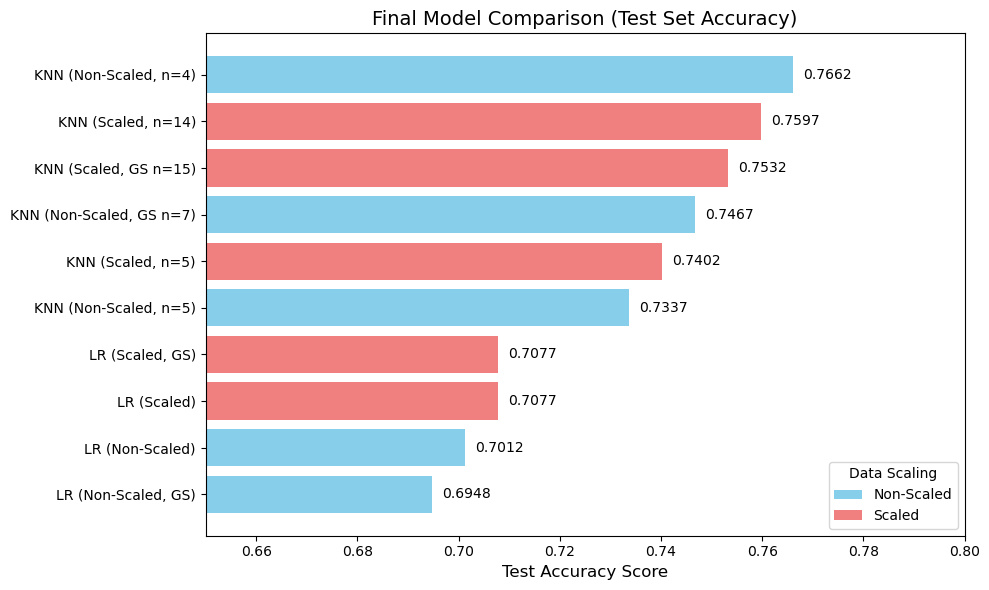

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터 정의 (변수명 및 키 수정)
model_data = {
    'model': [{
        'KNN (Non-Scaled, n=5)' : 0.7337,
        'KNN (Non-Scaled, n=4)': 0.7662, 
        'KNN (Scaled, n=5)': 0.7402, 
        'KNN (Scaled, n=14)': 0.7597,
        'KNN (Non-Scaled, GS n=7)': 0.7467,
        'KNN (Scaled, GS n=15)': 0.7532,
        'LR (Non-Scaled)': 0.7012,
        'LR (Scaled)': 0.7077,
        'LR (Non-Scaled, GS)': 0.6948,
        'LR (Scaled, GS)': 0.7077
    }]
}

# 2. 막대 그래프에 사용할 데이터 추출 및 정렬
# 데이터는 리스트의 0번째 요소에 있는 딕셔너리입니다.
performance_dict = model_data['model'][0]

# 점수를 기준으로 내림차순 정렬을 위해 zip 사용
sorted_items = sorted(performance_dict.items(), key=lambda item: item[1], reverse=False)

# 정렬된 설정 이름 (Y축)과 점수 (X축/Width) 추출
configurations = [item[0] for item in sorted_items]
scores = [item[1] for item in sorted_items]

# 3. 데이터 Scaling Type에 따른 색상 리스트 생성 (수정된 동적 매핑)
colors = []
for config in configurations:
    # 'Non-Scaled' 문자열이 명확하게 포함되어 있는 경우에만 푸른색(skyblue) 적용
    if 'Non-Scaled' in config:
        colors.append('skyblue')     # Non-Scaled 데이터
    # 그 외의 모든 경우 (즉, 'Scaled'만 포함된 경우)에 붉은색 계열 적용
    else:
        colors.append('lightcoral')  # Scaled 데이터 또는 기타
plt.figure(figsize=(10, 6))

# 4. 수평 막대 그래프 (plt.barh) 그리기
# plt.barh(y축 위치, 막대 길이)
bars = plt.barh(configurations, scores, color=colors) 

# 5. 그래프 꾸미기 (요청 내용 반영 및 점수 텍스트 추가)
plt.title('Final Model Comparison (Test Set Accuracy)', fontsize=14)
plt.xlabel('Test Accuracy Score', fontsize=12)
plt.xlim(0.65, 0.8)

# 막대에 점수 텍스트 추가
for bar in bars:
    plt.text(
        bar.get_width() + 0.002,
        bar.get_y() + bar.get_height()/2,
        f'{bar.get_width():.4f}',
        va='center'
    )

# 6. 범례 수동 생성 (Matplotlib은 barh의 색상 매핑을 자동으로 범례에 추가하지 않으므로 수동 처리)
legend_handles = [plt.Rectangle((0,0), 1, 1, fc='skyblue'), plt.Rectangle((0,0), 1, 1, fc='lightcoral')]
plt.legend(legend_handles, ['Non-Scaled', 'Scaled'], title='Data Scaling', loc='lower right')

plt.tight_layout()
plt.show()